In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# machine learning packages
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.tree import DecisionTreeRegressor, plot_tree

set_config(display='diagram', transform_output="pandas")

# Load Dataset¶

In [75]:
file = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/recharge/all_variables6a.csv")
# extract data only for one-hot encoding
data = file.drop(columns=['Lon', 'Lat', 'Borehole'])
data = data.drop('Rech_co_1', axis = 1)
data = data.drop('Rech_co_2', axis = 1)
data = data.drop('RechC_WTF3', axis = 1)
data = data.drop('RechC_MRC3', axis = 1)
data = data.drop('RechC_WTF3c', axis = 1)
data = data.drop('RechC_MRC3c', axis = 1)
data = data.drop('RechC_4', axis = 1)
#data = data.drop('RechC_4', axis = 1)
data.head()

,R_mm_year,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Slope_30m,Slope_100m,Slope_500m,Slope_5000m,Land_Use_type,Perc_clay,Perc_sand,Perc_silt,Soil_class
0,1022.53,1069.21100,1085.8702,0.984658,0.748040,91.0,2.928825,5.247280,5.547492,12.647192,243 - Land principally occupied by agriculture...,18.604446,49.043514,32.352036,CAMBISSOLOS
1,148.99,934.68770,1054.0730,0.886739,0.759074,69.0,1.425283,2.207789,4.168107,4.902558,212 - Permanently irrigated land,8.463341,71.482796,20.053864,PODZOIS
2,369.87,895.61194,1063.8200,0.841883,0.761298,93.0,1.655054,3.431121,4.697247,6.386671,312 - Coniferous forest,6.334242,74.322480,19.343277,CAMBISSOLOS
3,84.62,934.68770,1054.0730,0.886739,0.759074,85.0,1.502227,1.738666,4.875282,6.134731,212 - Permanently irrigated land,6.244911,83.027060,10.728027,PODZOIS
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#encode categorical variables
labelencoder = LabelEncoder()
data['land_use_type_cat'] = labelencoder.fit_transform(data['Land_Use_type'])
data['soil_class_cat'] = labelencoder.fit_transform(data['Soil_class'])

# remove categorical variables
data = data.drop('Land_Use_type', axis = 1)
#data = data.drop('landcover_cat', axis = 1)
#data = data.drop('soil_classification', axis = 1)
data = data.drop('Soil_class', axis = 1)
#data = data.drop('percent_clay', axis = 1)
#data = data.drop('Perc_sand', axis = 1)
#data = data.drop('Perc_silt', axis = 1)
#data = data.drop('land_use_type_cat', axis = 1)
#data = data.drop('slope_30m_percent', axis = 1)
#data = data.drop('Rainfall_Seasonality2', axis = 1)
data = data.drop(['Slope_5000m', 'Slope_500m', 'Slope_100m'], axis = 1)
data = data[data['R_mm_year'] > 0.5]
data.dropna(inplace=True)
data

,R_mm_year,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Slope_30m,Perc_clay,Perc_sand,Perc_silt,land_use_type_cat,soil_class_cat
0,1022.53,1069.21100,1085.8702,0.984658,0.748040,91.0,2.928825,18.604446,49.043514,32.352036,12,0
1,148.99,934.68770,1054.0730,0.886739,0.759074,69.0,1.425283,8.463341,71.482796,20.053864,5,4
2,369.87,895.61194,1063.8200,0.841883,0.761298,93.0,1.655054,6.334242,74.322480,19.343277,15,0
3,84.62,934.68770,1054.0730,0.886739,0.759074,85.0,1.502227,6.244911,83.027060,10.728027,5,4
6,54.37,1045.85880,1107.4349,0.944398,0.748662,264.0,5.504116,12.681211,50.982796,36.335990,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
135,1740.43,631.99600,1088.2620,0.580739,0.919057,163.0,3.216023,26.049686,35.114900,38.835415,8,3
136,1236.03,607.50230,1105.2213,0.549666,0.925135,119.0,1.518347,23.784560,37.215134,39.000305,8,3
137,404.16,571.71100,1130.1387,0.505877,0.930689,97.0,2.252468,26.848026,34.701523,38.450450,17,0
138,259.03,571.71100,1130.1387,0.505877,0.930689,99.0,1.385533,26.848026,34.701523,38.450450,17,0


In [78]:
# Labels are the values we want to predict
y = data['R_mm_year']
# Remove the labels from the features
X = data.drop('R_mm_year', axis = 1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [80]:
tree = DecisionTreeRegressor(random_state=42)  ## random_state=0 for reproducible results

In [81]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

features = list(X_train.columns)

plt.figure(figsize = (20, 8))
plot_tree(tree, 
          filled = True, 
          fontsize = 12,
          node_ids = True,
          rounded = True,
          proportion=True,
         feature_names= features)
plt.show()

In [82]:
y_pred_train = tree.predict(X_train)

mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)
print(mae)
print(mse)
print(rmse)
print(r2)

0.0
0.0
0.0
1.0


In [83]:
y_pred = tree.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

279.53538461538466
190525.82528461542
436.492640584713
0.3907376362811463


In [84]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for max_depth ranging from 1 to 10
param_grid = {'max_depth': [7],
            'min_samples_split': [2,3,4,5,6,7, 8, 9, 10],  # Minimum number of samples required to split, from 2 to 20, step by 2
            'min_samples_leaf': [1,2,3,4,5,8,9, 10, 11, 12, 13, 14, 15],  # Minimum number of samples in a leaf from 1 to 10
            'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
             }
# Creating the GridSearchCV object with Decision Tree Regressor and cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid, cv=5, verbose=1,
                           scoring='neg_mean_absolute_error',  n_jobs=-1)

# Fitting GridSearchCV with all explanatory features (using the full feature set for a comprehensive approach)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predicting on the test set with the best model
y_pred_best = best_model.predict(X_test)

# Evaluating the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

best_model_depth = best_model.max_depth
# Extracting the best parameters
best_params = grid_search.best_params_

mse_best, mae_best, r2_best, best_params

Fitting 5 folds for each of 1053 candidates, totalling 5265 fits


(102219.776331794,
 237.57315018315018,
 0.6731222003437756,
 {'max_depth': 7,
  'max_features': 0.2,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [ ]:
(119825.54913284654,
 267.6072507884273,
 0.6168225636103162,
 {'max_depth': 7,
  'max_features': 0.1,
  'min_samples_leaf': 1,
  'min_samples_split': 7})


(102219.776331794,
 237.57315018315018,
 0.6731222003437756,
 {'max_depth': 7,
  'max_features': 0.2,
  'min_samples_leaf': 1,
  'min_samples_split': 5})

In [85]:
# Predicting on the test set with the best model
y_pred_tra = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_pred_tra)
print(mae)
print(mse)
print(rmse)
print(r2)
print(f"Best training R^2: {r2t}")

237.57315018315018
102219.776331794
319.7182765057293
0.6731222003437756
Best training R^2: 0.7297123004710107


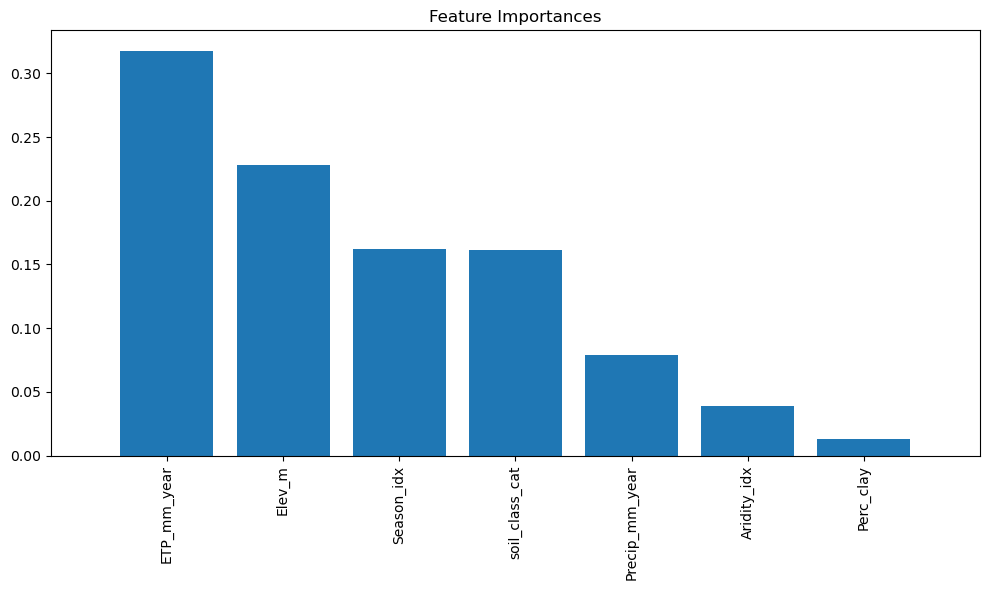

In [54]:
import matplotlib.pyplot as plt
import numpy as np

feature_list=list(X.columns)

# Get the feature importances from the best model
feature_importances = best_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange the feature names so they match the sorted importances
sorted_features = [feature_list[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
# Adjust layout to prevent label cutoff
plt.tight_layout()
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/DT_HP.png', format='png', dpi=3000)
plt.show()

In [13]:
features = list(X.columns)
feature_impotanceRT = pd.DataFrame({
    'Unormalized Importance': best_model.tree_.compute_feature_importances(normalize=False),
    'Normalized Importance': best_model.feature_importances_
}, index=features)
feature_impotanceRT

,Unormalized Importance,Normalized Importance
Precip_mm_year,41068.445211,0.179613
ETP_mm_year,31816.342585,0.139149
Aridity_idx,38120.923899,0.166722
Season_idx,74779.100005,0.327047
Elev_m,4113.910608,0.017992
Slope_30m,1080.338502,0.004725
Perc_clay,11801.618548,0.051615
Perc_sand,198.056628,0.000866
Perc_silt,114.384649,0.000500
land_use_type_cat,0.000000,0.000000


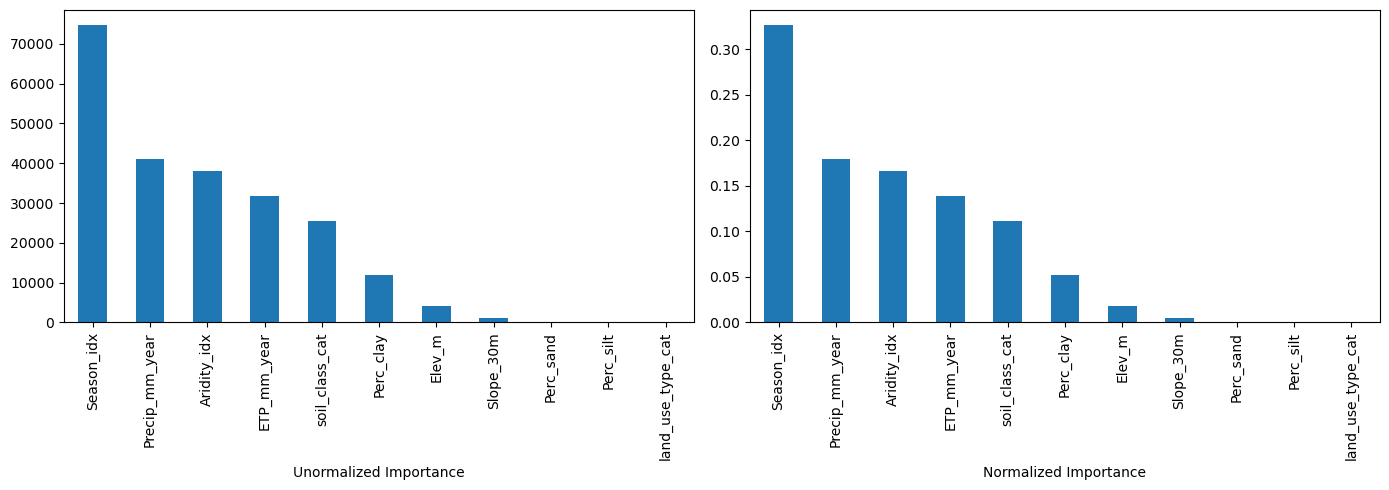

In [14]:
#plot feature importance (sorted by unnormalized importance)

feature_impotanceRT.sort_values(by="Unormalized Importance", ascending=False, inplace=True)

plt.subplot(1, 2, 1)
feature_impotanceRT["Unormalized Importance"].plot.bar(figsize=(14, 5))
plt.xlabel("Unormalized Importance")

plt.subplot(1, 2, 2)
feature_impotanceRT["Normalized Importance"].plot.bar(figsize=(14, 5))
plt.xlabel("Normalized Importance")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# instantiate models with no parameters first
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

y_pred_train = rfr.predict(X_train)
mae = mean_absolute_error(10**y_train, 10**y_pred_train)
mse = mean_squared_error(10**y_train, 10**y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(10**y_train, 10**y_pred_train)
print(mae)
print(mse)
print(rmse)
print(r2)

In [ ]:
y_pred_test = rfr.predict(X_test)
mae = mean_absolute_error(10**y_test, 10**y_pred_test)
mse = mean_squared_error(10**y_test, 10**y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(10**y_test, 10**y_pred_test)
print(mae)
print(mse)
print(rmse)
print(r2)

In [ ]:
import matplotlib.pyplot as plt
# Assuming `best_model` is your trained RandomForestRegressor from GridSearchCV
# Extract feature importances
importances = rfr.feature_importances_

# Sort feature importances in descending order (optional)
indices = np.argsort(importances)[::-1]

# Get the sorted feature names
sorted_feature_names = [feature_list[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [5, 10, 50],
                'max_depth' : [12, 18, 22],
                'max_features' : [0.01, 0.1, 0.33, 'sqrt', 1],
                'max_leaf_nodes': [50, 100, 500]    
            }
rfr1 = RandomForestRegressor()
rfr1 = GridSearchCV(rfr1, parameters, scoring='neg_mean_squared_error', cv=3)
rfr1.fit(X_train, y_train)

In [ ]:
# Best model evaluation
best_model = rfr1.best_estimator_
y_pred_train1 = best_model.predict(X_train)
mae = mean_absolute_error(10**y_train, 10**y_pred_train1)
mse = mean_squared_error(10**y_train, 10**y_pred_train1)
rmse = np.sqrt(mse)
r2 = r2_score(10**y_train, 10**y_pred_train1)
print(mae)
print(mse)
print(rmse)
print(r2)

In [ ]:
y_pred_test1 = best_model.predict(X_test)
mae = mean_absolute_error(10**y_test, 10**y_pred_test1)
mse = mean_squared_error(10**y_test, 10**y_pred_test1)
rmse = np.sqrt(mse)
r2 = r2_score(10**y_test, 10**y_pred_test1)
print(mae)
print(mse)
print(rmse)
print(r2)

In [ ]:
# Extract feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order (optional)
indices = np.argsort(importances)[::-1]

# Get the sorted feature names
sorted_feature_names = [feature_list[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


healthexp = sns.load_dataset('healthexp')
#healthexp.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/healthexp.csv", index=False)

healthexp.head(100)

In [ ]:
healthexp = pd.get_dummies(healthexp)
healthexp

In [ ]:
X = healthexp.drop(['Life_Expectancy'], axis=1)
y = healthexp['Life_Expectancy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
rfr = RandomForestRegressor(random_state=13)

In [ ]:
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [ ]:
print(f'{mean_absolute_error(y_test, y_pred)}')
print(f'{mean_squared_error(y_test, y_pred)}')
r2_score(y_test, y_pred)

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    
    model = RandomForestRegressor(n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf)
    
    score = cross_val_score(model, X, y, n_jobs=-1, cv=5, scoring='neg_mean_squared_error').mean()
    return score

In [ ]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42)) # Default is random Search

In [ ]:
study.optimize(objective, n_trials=100)

In [ ]:
best_params = study.best_params
best_score = study.best_value

In [ ]:
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_score:.3f}")

In [ ]:
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']

In [ ]:
best_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf)
best_model.fit(X_train, y_train)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print(f'{mean_absolute_error(y_test, y_pred)}')
print(f'{mean_squared_error(y_test, y_pred)}')
r2_score(y_test, y_pred)

In [134]:
import pandas as pd

In [135]:
file = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/all_variables_6a.csv")
# extract data only for one-hot encoding
data = file.drop(columns=['Lon', 'Lat', 'Borehole'])
data = data.drop('Rech_co_1', axis = 1)
data = data.drop('Rech_co_2', axis = 1)
#data = data.drop('RechC_WTF3', axis = 1)
data = data.drop('RechC_MRC3', axis = 1)
data = data.drop('RechC_WTF3c', axis = 1)
data = data.drop('RechC_MRC3c', axis = 1)
data = data.drop('RechC_4', axis = 1)
#data = data.drop('RechC_4', axis = 1)
data = data.drop('R_mm_year', axis= 1)
data.head()

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Slope_30m,Slope_100m,Slope_500m,Slope_5000m,Land_Use_type,Perc_clay,Perc_sand,Perc_silt,Soil_class,RechC_WTF3,slope
0,1069.21100,1085.8702,0.984658,0.748040,91.0,2.928825,5.247280,5.547492,12.647192,243 - Land principally occupied by agriculture...,18.604446,49.043514,32.352036,CAMBISSOLOS,NaN,1.300978
1,934.68770,1054.0730,0.886739,0.759074,69.0,1.425283,2.207789,4.168107,4.902558,212 - Permanently irrigated land,8.463341,71.482796,20.053864,PODZOIS,0.771858,3.133171
2,895.61194,1063.8200,0.841883,0.761298,93.0,1.655054,3.431121,4.697247,6.386671,312 - Coniferous forest,6.334242,74.322480,19.343277,CAMBISSOLOS,0.213221,4.072707
3,934.68770,1054.0730,0.886739,0.759074,85.0,1.502227,1.738666,4.875282,6.134731,212 - Permanently irrigated land,6.244911,83.027060,10.728027,PODZOIS,0.318032,1.300978
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.696956,NaN


In [136]:
#encode categorical variables
#labelencoder = LabelEncoder()
#data['land_use_type_cat'] = labelencoder.fit_transform(data['Land_Use_type'])
#data['soil_class_cat'] = labelencoder.fit_transform(data['Soil_class'])

# remove categorical variables
data = data.drop('Land_Use_type', axis = 1)
#data = data.drop('landcover_cat', axis = 1)
data = data.drop('Perc_clay', axis = 1)
data = data.drop('Soil_class', axis = 1)
data = data.drop('slope', axis = 1)
#data = data.drop('Elev_m', axis = 1)
data = data.drop('Perc_sand', axis = 1)
data = data.drop('Perc_silt', axis = 1)
#data = data.drop('Aridity_idx', axis = 1)
data = data.drop('Slope_30m', axis = 1)
#data = data.drop('Precip_mm_year', axis = 1)
#data = data.drop('Rainfall_Seasonality2', axis = 1)
data = data.drop(['Slope_5000m', 'Slope_500m', 'Slope_100m'], axis = 1)
#data = data[data['R_mm_year'] > 0.5]
data.dropna(inplace=True)
data

,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,RechC_WTF3
1,934.68770,1054.0730,0.886739,0.759074,69.0,0.771858
2,895.61194,1063.8200,0.841883,0.761298,93.0,0.213221
3,934.68770,1054.0730,0.886739,0.759074,85.0,0.318032
6,1045.85880,1107.4349,0.944398,0.748662,264.0,0.568064
7,1066.19510,1111.6426,0.959117,0.757137,267.0,0.080209
...,...,...,...,...,...,...
128,609.93190,1091.1353,0.558988,0.909014,110.0,0.418082
131,607.50230,1105.2213,0.549666,0.925135,118.0,0.917140
132,631.99600,1088.2620,0.580739,0.919057,80.0,0.408665
137,571.71100,1130.1387,0.505877,0.930689,97.0,0.239136


In [137]:
X = data.drop('RechC_WTF3', axis=1)
y = data['RechC_WTF3']

In [138]:
import statsmodels.api as sm

In [139]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [140]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [141]:
# Print the summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             RechC_WTF3   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.704
Date:                Tue, 03 Sep 2024   Prob (F-statistic):            0.00431
Time:                        17:02:06   Log-Likelihood:                 15.012
No. Observations:                  95   AIC:                            -18.02
Df Residuals:                      89   BIC:                            -2.700
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8675      2.297      2.

In [10]:
# Generate a correlation matrix
correlation_matrix = data[['RechC_WTF3','Precip_mm_year','ETP_mm_year','Aridity_idx', 'Season_idx','Elev_m',	'Perc_clay',
                           'Perc_sand',	'Perc_silt','slope']].corr()

# Display the correlation matrix
correlation_matrix


,RechC_WTF3,Precip_mm_year,ETP_mm_year,Aridity_idx,Season_idx,Elev_m,Perc_clay,Perc_sand,Perc_silt,slope
RechC_WTF3,1.000000,0.001750,-0.206599,0.053073,0.056343,0.252029,-0.055823,-0.046851,0.144768,0.121530
Precip_mm_year,0.001750,1.000000,-0.569373,0.946666,-0.057713,0.024431,-0.489800,0.541622,-0.447718,0.060674
ETP_mm_year,-0.206599,-0.569373,1.000000,-0.786434,-0.463084,0.004621,0.201981,-0.192555,0.129085,-0.083624
Aridity_idx,0.053073,0.946666,-0.786434,1.000000,0.082261,-0.009841,-0.415870,0.478723,-0.414143,0.075235
Season_idx,0.056343,-0.057713,-0.463084,0.082261,1.000000,-0.398225,0.333838,-0.343242,0.258417,0.026572
Elev_m,0.252029,0.024431,0.004621,-0.009841,-0.398225,1.000000,-0.254908,-0.011178,0.295526,0.013402
Perc_clay,-0.055823,-0.489800,0.201981,-0.415870,0.333838,-0.254908,1.000000,-0.877614,0.502539,-0.006971
Perc_sand,-0.046851,0.541622,-0.192555,0.478723,-0.343242,-0.011178,-0.877614,1.000000,-0.855474,0.005938
Perc_silt,0.144768,-0.447718,0.129085,-0.414143,0.258417,0.295526,0.502539,-0.855474,1.000000,-0.003304
slope,0.121530,0.060674,-0.083624,0.075235,0.026572,0.013402,-0.006971,0.005938,-0.003304,1.000000
